<a href="https://colab.research.google.com/github/keshavmot/Case-Study-Notebooks/blob/main/CaseStudy_Yulu_KeshavMot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keshav Mot | Business Case: Yulu - Hypothesis Testing

##Problem Statement
* Yulu (a micro-mobility service provider) want to understand the factors affecting the demand for the shared electric cycles offered by them in the Indian market.
* We would be intrested in knowing the variables that are significant in predicting the demand for the shared electric cycles and how well those describe the electric cycle demands.
* A data set is provided by the company containing information of the number of rental bike used in a particular time interval along with the weather conditons and other factors that might affect the usage of the bikes.
* Our approch is by creating several test for judging the Hypothesis and checking the assumptions of the test by graphical and statistical methods.

#Dataset Observation

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv

--2023-10-14 15:24:36--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.93, 99.84.178.226, 99.84.178.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu_data.csv’

yulu_data.csv       100%[===================>] 633.16K  --.-KB/s    in 0.008s  

2023-10-14 15:24:36 (81.5 MB/s) - ‘yulu_data.csv’ saved [648353/648353]



In [ ]:
yulu_df = pd.read_csv("yulu_data.csv")
df2 = yulu_df.copy(deep=True)

yulu_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
#Shape of the Data frame
yulu_df.shape

(10886, 12)

Total entries in dataset is 10886 rows and it contains 12 column.

In [ ]:
#Checking information column wise
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Convertion of datetime column to timestamp
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

In [ ]:
#Converting categorical features to object type data.
cats= ['season', 'holiday', 'workingday', 'weather']
for col in cats:
    yulu_df[col] = yulu_df[col].astype('object')

yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


We have 12 column in total:
* datetime column id object type but is clearly a datetime Data type
* Object Data type:
 * holiday and working day as True or false (represented by 1 or 0)
 * season and weather are represented with ints but contain categorical data (Info separately provided in "Column Profiling" of problem statement)

* Sum of 4 column contain Dtype as integer
  * humidity column contain information of relative humidity
  * casual, registered and count Columns contain information of count of bikes uses.


* And rest 3 are float type:
 * temp and atemp(feeling temperature) in Celsius
 * windspeed (Assuming as km/h)


* We also observed there is Zero null values in the dataset.

In [ ]:
#Describing the columns of dataset.
yulu_df.describe(include='all')

<ipython-input-311-3e1e31658def>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yulu_df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


Obsevation of numerical columns:
* datetime : Data ranges from date Jan 2011 to Dec 2012
* holiday   :      2.85% of total days are holidays
* workingday :   68.08% of total days are working
* temp :         Temperature can vary from 0.8 to 41 degree Celsius
* humidity : humidity  can vary from 0 to 100%
* windspeed : 0 to 57 km/h
* casual, registered and count:
 * Max number use of bikes in a day is 977 with minimum at 1 per day
 * All features show high amount of standard deviation compared to the mean value



---
# Graphical Analysis

In [ ]:
df = yulu_df.copy(deep=True)

NOTE: Question & analysis both are above the respective code

**Q: What is the distribution working vs non working days?**

* working days are approx double in amount than non working days.

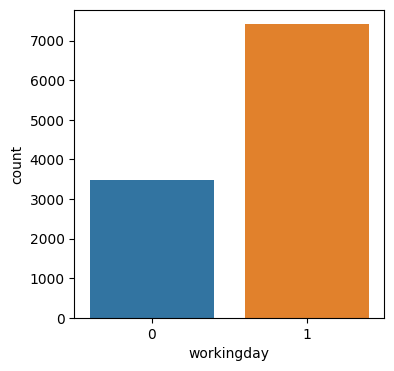

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='workingday')
plt.show()

**Q: What is the ration of season in the data set?**

* Different type of season have equal ratio in the data set, indicating the data we have contain entires from whole year.

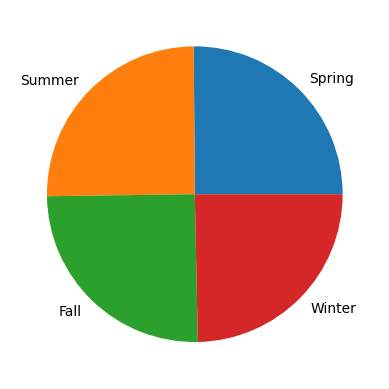

In [ ]:
plt.pie(df['season'].value_counts(), labels = ["Spring","Summer",'Fall','Winter'])
plt.show()

**Q: What is the distribution of weather in Indian Cities for yulu bike opeartion?**

* Weather is mostly clear with partly cloudy for max number of days
* Mist with few clouds is second most common weather
* There are a small chance of rain and heavy thunderstrom are rare.

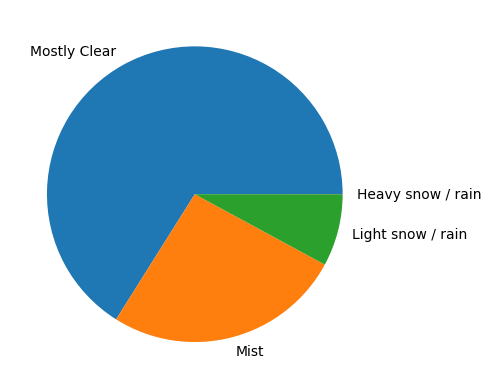

In [ ]:
plt.pie(df['weather'].value_counts(), labels = ["Mostly Clear","Mist",'Light snow / rain','Heavy snow / rain'])
plt.show()

**Q: What is the acutal temperature around the year and how different is from feel temperature?**

* Temperature mostly range from 10 to 40 degrees C.
* There is constant difference in 'actual temperature' and 'feel temperature' around the year, as per the graph 'feel temperature' is offset towards the right side indicating 'feel temperature' is few degree more than acutal temperatures.
* Difference in mean temperatures is around ~3.5 degrees C

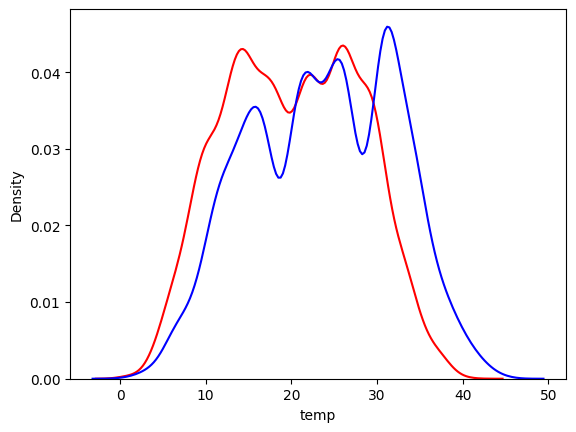

Mean Actual Temp: 20.23085981995223
Mean Feel Temp: 23.655084052912


In [ ]:
sns.kdeplot(df['temp'], color="red")
sns.kdeplot(df['atemp'], color="blue")
plt.show()

#Mean Temp values
print("Mean Actual Temp:",df['temp'].mean())
print("Mean Feel Temp:",df['atemp'].mean())

**Q: What are the wind speeds distribution?**

* Graph is right skewed with a spike at 0 wind speed.
* There are few chances of a very low speed of wind, either there is no wind or a wind of significant speed.

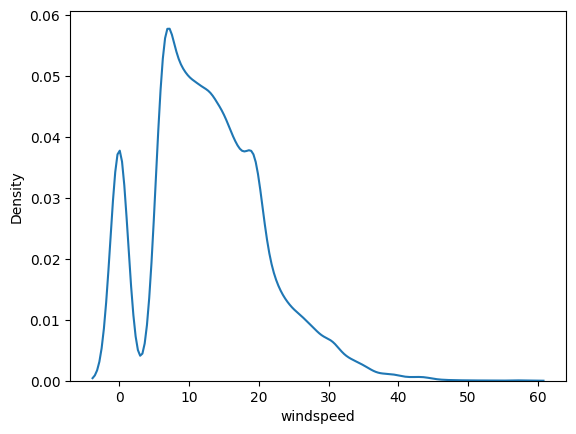

In [ ]:
sns.kdeplot(df['windspeed'])
plt.show()

**Q:Which features shows higher number of outliers than other (using BoxPlot)?**

* 'Actual Temperature' and 'Feel Temperature' both features do not show any outliers.
* 'Humidity' have outliers at 'Zero' Humidity representing very dry weather.

* 'windspeed' have few outliers for more than ~32 kmph speed
* No of bookings:
 * 'Casual' bookings have very high number of outliers anything above ~120 bookings is considered as outlier in this case.
 * 'Registered' bookings have also high number of outliers anything above ~500 bookings is considered as outlier in this case.
 * 'Registered' users have overliers at high bike count than of "casual: users which make sense as user who use bike regularly will have high chance of being register with the Yulu company.

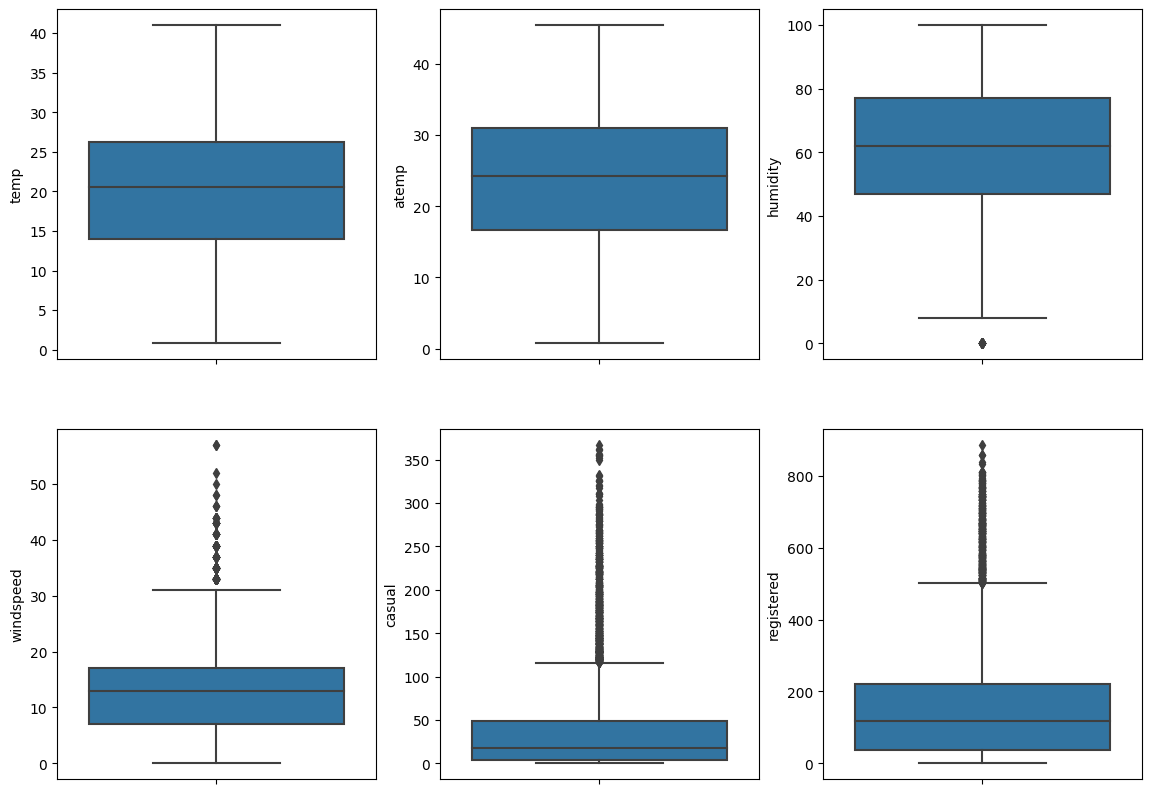

In [ ]:
#Combined Boxplot for multiple features
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="temp")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="atemp")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="humidity")
plt.subplot(2,3,4)
sns.boxplot(data=df, y="windspeed")
plt.subplot(2,3,5)
sns.boxplot(data=df, y="casual")
plt.subplot(2,3,6)
sns.boxplot(data=df, y="registered")
plt.show()

**Q:Comment on Correlation between different features?**

* Dependent features:
 * **'Actual Temperature**' and **'Feel Temperature'** are dependent hence have a direct correlation.
 * '**Casual User**' and '**Total Count**' are dependent hence high correlation
 * Similarly '**Registered User**' and '**Total Count**' are dependent.

* Independent features:
 * '**Workingday**' and '**Casual User**' have significant negetive correlation, hence having a Non-working day leads to more casual users for Yulu.
 * '**Humidity**' and '**Casual User**' also have significant negetive correlation, hence having a lower humidity(Clear weather) leads to more casual users for Yulu.
 * '**Humidity**' and '**Weather**' have significant positive correlation, hence higher humidity indicates to heavier thunderstrom (Snowfall or Waterfall)


<ipython-input-319-f3a3811d1bbe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)


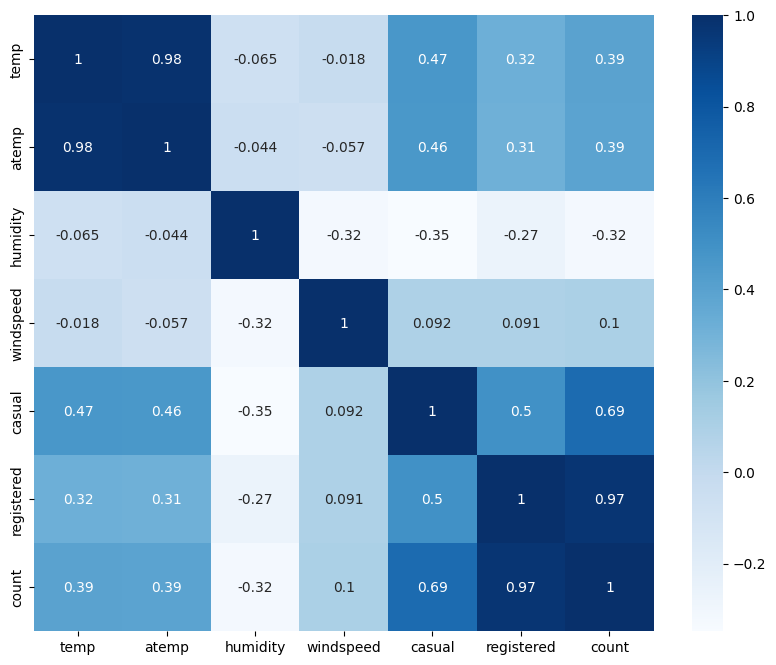

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

---
# Hypothesis Testing


In [ ]:
#Normal
from scipy.stats import norm

#T-Test
from scipy.stats import t, ttest_1samp, ttest_ind, ttest_rel

#ChiSquared Test
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical (Test of Independence)

#ANOVA
from scipy.stats import f,f_oneway

#Assumptions Checking
from scipy.stats import kruskal, levene #For Equal Variance
from scipy.stats import shapiro, kstest #For Normality
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

---
# Two Sample T-Test

**Q. Check if Working Day has an effect on the number of electric cycles rented?**



As we are testing the effect on a numerical feature by a categorical feature we will be using T-Test for testing the hypothesis.
* H0 (mu1 = mu2) : Null Hypothesis - Working day or Non-Working day have **NO Effect** on number of cycles rented.
* H1 (mu1 != mu2) : Alternate hypothesis - Non-Working day **Effect** number of cycles rented than Working Day.

In [ ]:
# Taking count of total rental bikes used on working and non working days
workday_count = df[df['workingday']==1]['count']
nonworkday_count = df[df['workingday']==0]['count']

In [ ]:
#Checking number of workingday are true (i.e 1)
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
#Mean of each type of day
print("Working day Mean : ", workday_count.mean()," | Non-Working day Mean : ", nonworkday_count.mean())

Working day Mean :  193.01187263896384  | Non-Working day Mean :  188.50662061024755


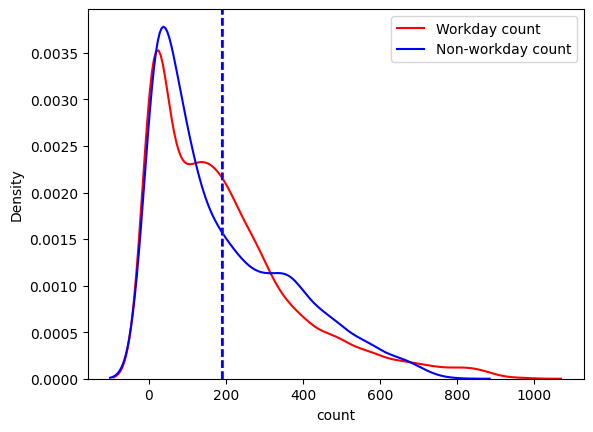

In [ ]:
#Checking the distribution for each type of day.
sns.kdeplot(workday_count, color="red", label='Workday count')
sns.kdeplot(nonworkday_count, color="blue", label='Non-workday count')

plt.axvline(workday_count.mean(), color="red",linestyle="--")
plt.axvline(nonworkday_count.mean(), color="blue",linestyle="--")

plt.legend()

Text(0.5, 0, 'Workday')

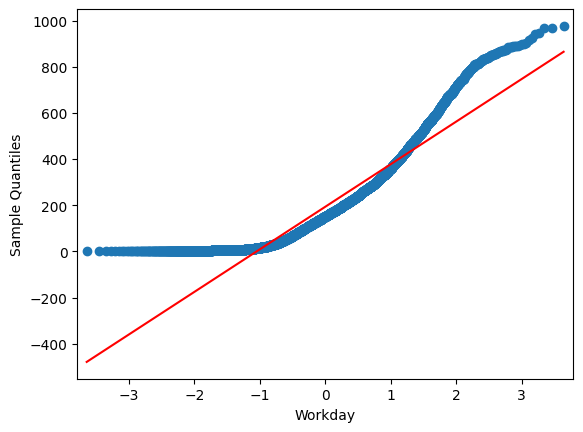

In [ ]:
#Checking Normality using QQ plot
qqplot(workday_count, line='s')
plt.xlabel('Workday')

Text(0.5, 0, 'Non-workday')

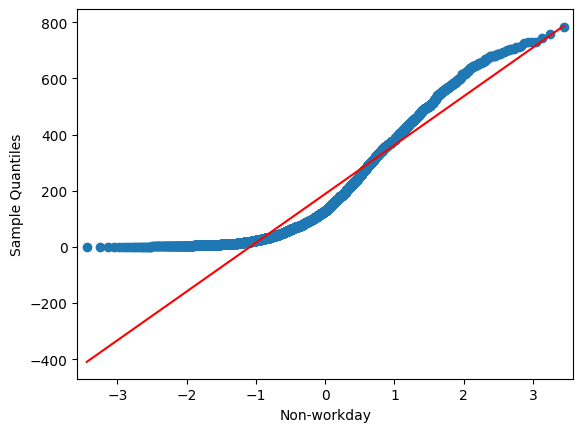

In [ ]:
#Checking Normality using QQ plot
qqplot(nonworkday_count, line='s')
plt.xlabel('Non-workday')

* Using QQplot we can observe that the data Present is **Not Normal**
* Above assumptions is failed but we will continue further analysis

In [ ]:
#Checking Equal Variance using levene’s test

# Ho : (Null Hypothesis) Variance is similar for data of both type of days
# Ha : (Alternate hypothesis)  Variance is different for data of both type of days
l_stats, p_value = levene(workday_count, nonworkday_count)
print("Levene_stat : ",l_stats)
print("p_value : ",p_value)

alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

Levene_stat :  0.004972848886504472
p_value :  0.9437823280916695
Interpretation : Fail to Reject Ho


* While checking for the varience we failed to reject Null Hypothes
* Hence Variance  is similar for data of both type of days

In [ ]:
# Using T-Test (Independent)

# H0 (mu1 = mu2) : Null Hypothesis - Working day or Non-Working day have **NO Effect** on number of cycles rented.
# H1 (mu1 != mu2) : Alternate hypothesis - Non-Working day **Effect** number of cycles rented than Working Day.

t_stats, p_value = ttest_ind(workday_count, nonworkday_count, alternative= "greater")
print("T_stat : ",t_stats)
print("p_value : ",p_value)

# Using significance level (alpha) of 5%
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

T_stat :  1.2096277376026694
p_value :  0.11322402113180674
Interpretation : Fail to Reject Ho


Inference:
* We failed to reject null hypothesis, Hence we can conclude that Working day or Non-Working day have **No Statistical Significance** on number of cycles rented.
* Note: Test perfomed on the data do not follow a normal distribution.

---
# ANNOVA - 1

**Q1. Is Number of cycles rented similar or different in different weather?**

As we are testing the effect on a numerical feature by a categorical feature (More than Two) we will be using ANNOVA for testing the hypothesis.
* H0 (mu1 = mu2 = mu3 = mu4) : Null Hypothesis - Number of cycles rented is same for all weather.
* H1 (mu1 != mu2 != mu3 != mu4) : Alternate hypothesis - Number of cycles rented is different for all weather.

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since Weather type 4 (Heavy Rain / Snow) have only 1 entry we will not use this for testing

In [ ]:
# Taking count of total rental bikes used in different weather conditions
w1_count = df[df['weather']==1]['count']
w2_count = df[df['weather']==2]['count']
w3_count = df[df['weather']==3]['count']

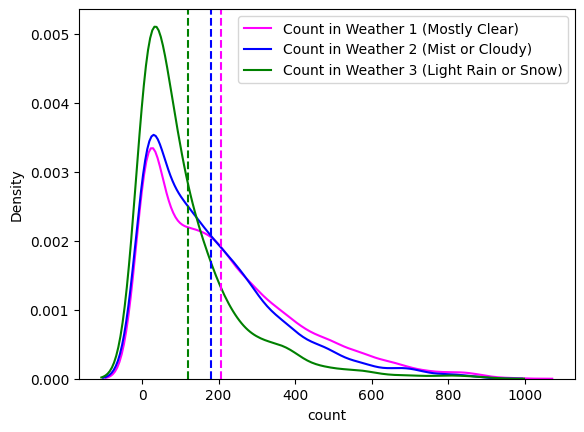

In [ ]:
# Visual Inspection
sns.kdeplot(w1_count, color="magenta", label='Count in Weather 1 (Mostly Clear)')
sns.kdeplot(w2_count, color="blue", label='Count in Weather 2 (Mist or Cloudy)')
sns.kdeplot(w3_count, color="green", label='Count in Weather 3 (Light Rain or Snow)')

plt.axvline(w1_count.mean(), color="magenta",linestyle="--")
plt.axvline(w2_count.mean(), color="blue",linestyle="--")
plt.axvline(w3_count.mean(), color="green",linestyle="--")

plt.legend()

Text(0.5, 0, 'Weather 1 count')

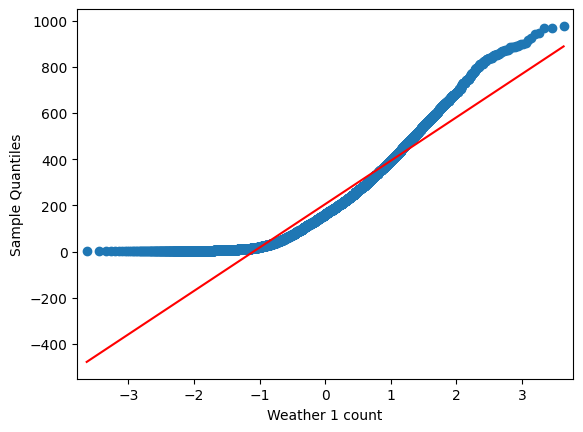

In [ ]:
#Checking Normality using QQ plot 1
qqplot(w1_count, line='s')
plt.xlabel('Weather 1 count')

Text(0.5, 0, 'Weather 2 count')

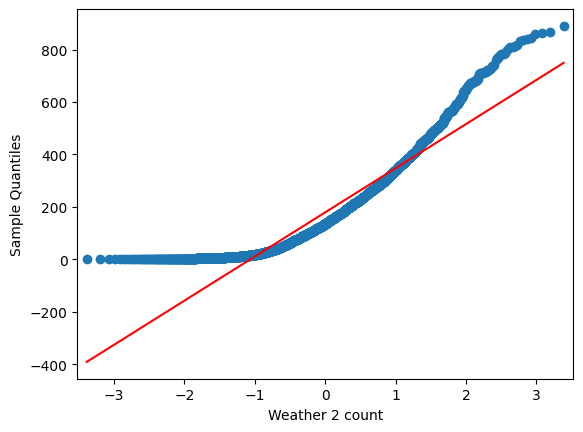

In [ ]:
#Checking Normality using QQ plot 2
qqplot(w2_count, line='s')
plt.xlabel('Weather 2 count')

Text(0.5, 0, 'Weather 3 count')

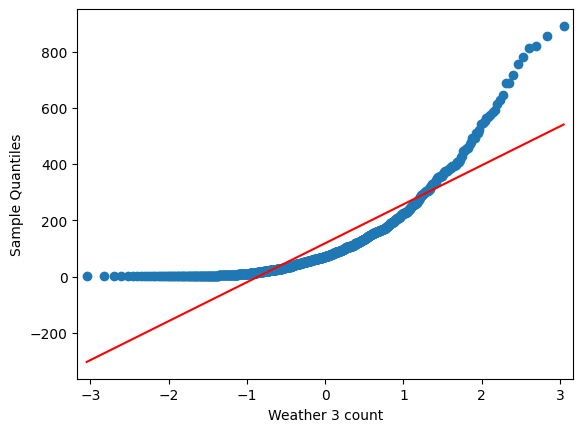

In [ ]:
#Checking Normality using QQ plot 3
qqplot(w3_count, line='s')
plt.xlabel('Weather 3 count')

* Using QQplot we can observe that the data Present is **Not Normal**
* Above assumptions is failed but we will continue further analysis

In [ ]:
#Checking Equal Variance using levene’s test

# Ho : (Null Hypothesis) Variance is similar for all weather count
# Ha : (Alternate hypothesis)  Variance is different between atleast one of the weather count
k_stats, p_value = kruskal(w1_count, w2_count, w3_count)
print("kruskal_stat : ",k_stats)
print("p_value : ",p_value)

alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

kruskal_stat :  204.95566833068537
p_value :  3.122066178659941e-45
Interpretation : Reject Ho


* While checking for the varience we concluded to reject Null Hypothes and choose alternate hypothesis
* Hence Variance is different between atleast one of the weather count

In [ ]:
# Using ANNOVA

# * H0 (mu1 = mu2 = mu3) : Null Hypothesis - Number of cycles rented is same for all weather.
# H1 (mu1 != mu2 != mu3) : Alternate hypothesis - Number of cycles rented is different for all weather.

annova_stats, p_value = f_oneway(w1_count, w2_count, w3_count)
print("ANNOVA stats : ",annova_stats)
print("p_value : ",p_value)

# Using significance level (alpha) of 5%
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

ANNOVA stats :  98.28356881946706
p_value :  4.976448509904196e-43
Interpretation : Reject Ho


Inference:
* We can reject the null hypothesis, Hence we can conclude that weather have **Statistical Significance** on number of cycles rented (Alternate hypothesis).
* Note: Test perfomed on the data do not follow a normal distribution and do not have equal variance between the groups.

---
#ANNOVA - 2
**Q2. Is Number of cycles rented similar or different in different season?**

As we are testing the effect on a numerical feature by a categorical feature (More than Two) we will be using T-Test for testing the hypothesis.
* H0 (mu1 = mu2 = mu3 = mu4) : Null Hypothesis - Number of cycles rented is same for all season.
* H1 (mu1 != mu2 != mu3 != mu4) : Alternate hypothesis - Number of cycles rented is different for all season.

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

All season have almost equal entries in the dataset.

In [ ]:
# Taking count of total rental bikes used in different seasons
s1_count = df[df['season']==1]['count']
s2_count = df[df['season']==2]['count']
s3_count = df[df['season']==3]['count']
s4_count = df[df['season']==4]['count']

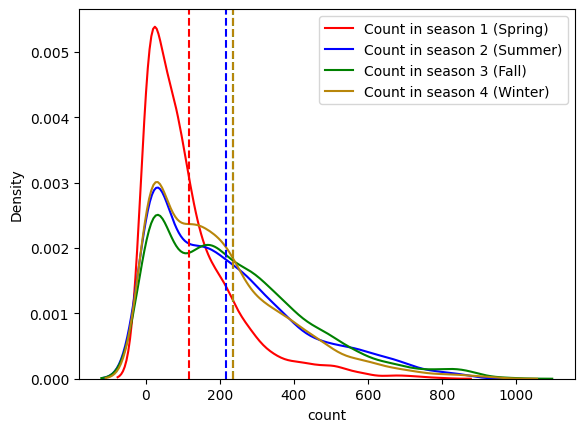

In [ ]:
# Visual Inspection
sns.kdeplot(s1_count, color="red", label='Count in season 1 (Spring)')
sns.kdeplot(s2_count, color="blue", label='Count in season 2 (Summer)')
sns.kdeplot(s3_count, color="green", label='Count in season 3 (Fall)')
sns.kdeplot(s4_count, color="darkgoldenrod", label='Count in season 4 (Winter)')

plt.axvline(s1_count.mean(), color="red",linestyle="--")
plt.axvline(s2_count.mean(), color="blue",linestyle="--")
plt.axvline(s3_count.mean(), color="green",linestyle="--")
plt.axvline(s3_count.mean(), color="darkgoldenrod",linestyle="--")

plt.legend()

Text(0.5, 0, 'Season 1 count')

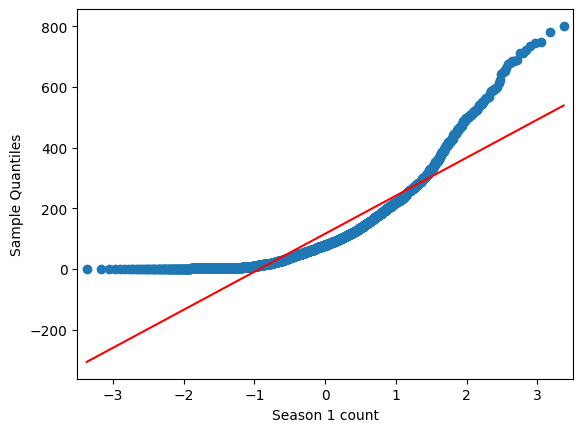

In [ ]:
#Checking Normality using QQ plot 1
qqplot(s1_count, line='s')
plt.xlabel('Season 1 count')


Text(0.5, 0, 'Season 2 count')

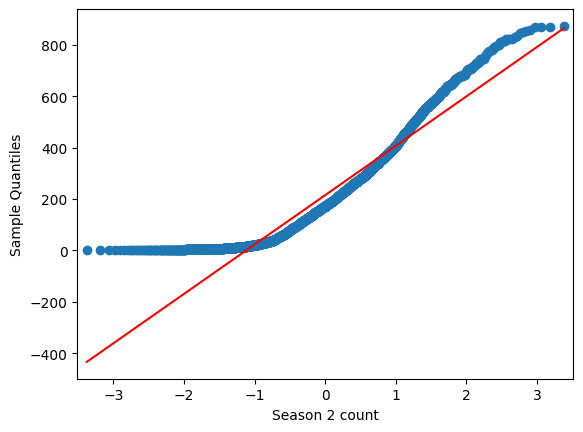

In [ ]:
#Checking Normality using QQ plot 2
qqplot(s2_count, line='s')
plt.xlabel('Season 2 count')

Text(0.5, 0, 'Season 3 count')

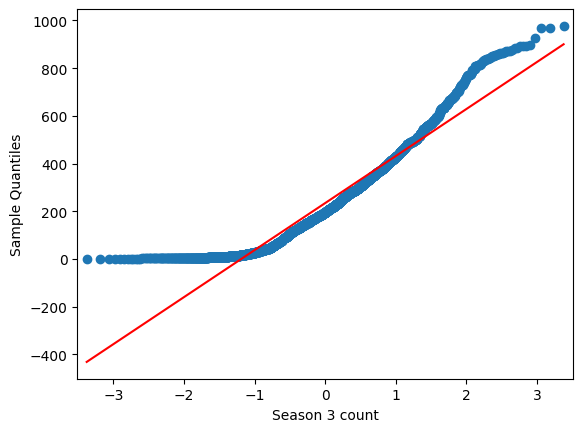

In [ ]:
#Checking Normality using QQ plot 3
qqplot(s3_count, line='s')
plt.xlabel('Season 3 count')


Text(0.5, 0, 'Season 4 count')

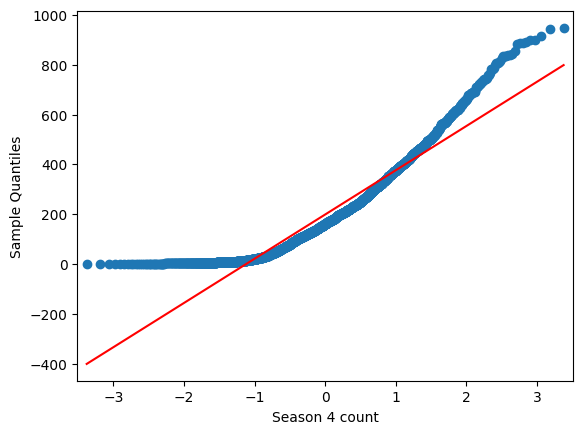

In [ ]:
#Checking Normality using QQ plot 4
qqplot(s4_count, line='s')
plt.xlabel('Season 4 count')

* Using QQplot we can observe that the data of season count is **Not Normal**
* Above assumptions is failed but we will continue further analysis

In [ ]:
#Checking Equal Variance using levene’s test

# Ho : (Null Hypothesis) Variance is similar for all season count
# Ha : (Alternate hypothesis)  Variance is different between atleast one of the season count
k_stats, p_value = kruskal(s1_count, s2_count, s3_count, s4_count)
print("kruskal_stat : ",k_stats)
print("p_value : ",p_value)

alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

kruskal_stat :  699.6668548181988
p_value :  2.479008372608633e-151
Interpretation : Reject Ho


* While checking for the varience we concluded to reject Null Hypothes and choose alternate hypothesis
* Hence Variance is different between atleast one of the weather count

In [ ]:
# Using ANNOVA

# * H0 (mu1 = mu2 = mu3) : Null Hypothesis - Number of cycles rented is same for all season.
# H1 (mu1 != mu2 != mu3) : Alternate hypothesis - Number of cycles rented is different for all season.

annova_stats, p_value = f_oneway(s1_count, s2_count, s3_count, s4_count)
print("ANNOVA stats : ",annova_stats)
print("p_value : ",p_value)

# Using significance level (alpha) of 5%
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

ANNOVA stats :  236.94671081032106
p_value :  6.164843386499654e-149
Interpretation : Reject Ho


Inference:
* We can reject the null hypothesis, Hence we can conclude that season have **Statistical Significance** on number of cycles rented (Alternate hypothesis).
* Note: Test perfomed on the data do not follow a normal distribution and do not have equal variance between the groups.

---
# Chi-square test

Q. Is Weather dependent on the season?

As we are testing the effect on a categorical feature  by a categorical feature we will be using Chi-square (Test of Independence) for testing the hypothesis.
* H0 : Null Hypothesis - Weather is NOT dependent on the season  (Independant)
* H1 : Alternate hypothesis - Weather dependent on the season (Dependant)

In [ ]:
sw_df = pd.crosstab(df['season'], df['weather'])
sw_df

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


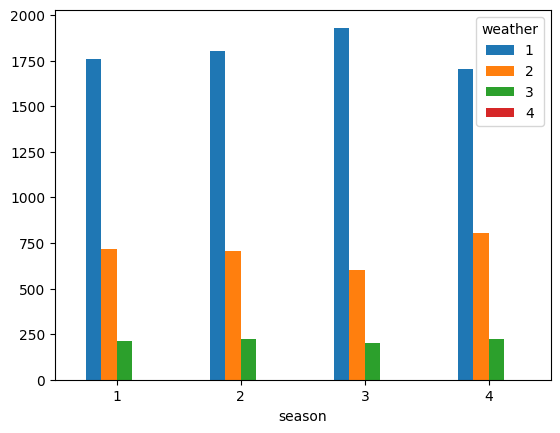

In [ ]:
# Visual Inspection

# Season (1: spring, 2: summer, 3: fall, 4: winter)
# Weather (1: Mostly Clear, 2: Mist or Cloudy, 3: Light Rain or Snow, 4: Thunderstorm)

barplot = sw_df.plot.bar(rot=0)

In [ ]:
# Using chi2_contingency test

#H0 : Null Hypothesis - Weather is NOT dependent on the season  (Independant)
#H1 : Alternate hypothesis - Weather dependent on the season (Dependant)
chi_stat, p_value, dof, expected_freq = chi2_contingency(sw_df)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq : \n",expected_freq,"\n")

alpha = 0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  49.158655596893624
p_value :  1.549925073686492e-07
dof :  9
expected_freq : 
 [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]] 

Interpretation : Reject Ho


**Checking Assumptions:**
  * Assumption 1: Both variables are categorical
  * Assumption 2: All observations are independent
  * Assumption 3: Cells in the contingency table are mutually exclusive.
  * Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.



All Assumptions are fulfilled except the last one as 4 cells out of 16 cells (25%) have a value less than 5.

**Inference:**
* We can reject the null hypothesis, Hence we can conclude that weather have **Statistical dependence** on the season (Alternate hypothesis).
* Note: If we consider the graph above distribution of rented cycle ratio in different season looks equally distributed. Hence Graphical inference suggest Weather is NOT dependent on the season
